In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 


import sklearn.metrics as skm
import sklearn.model_selection as skms
import sklearn.preprocessing as skp


import librosa, IPython
import librosa.display as lplt
seed = 12
np.random.seed(seed)

from os import read
import numpy as np

import librosa
import pandas as pd


from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()


In [5]:
df=pd.read_csv('Data/features_3_sec.csv')
df = df.drop(['harmony_mean','harmony_var','harmony_var','harmony_mean','perceptr_mean','perceptr_var'],axis = 1)
df


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,rock.00099.5.wav,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
9986,rock.00099.6.wav,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
9987,rock.00099.7.wav,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock
9988,rock.00099.8.wav,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock


In [3]:
print("Dataset has",df.shape)
df.label.value_counts().reset_index()

Dataset has (9990, 55)


,index,label
0,blues,1000
1,jazz,1000
2,metal,1000
3,pop,1000
4,reggae,1000
5,disco,999
6,classical,998
7,hiphop,998
8,rock,998
9,country,997


In [4]:
data = df.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

# normalize
X

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,3015.559458,...,5.773784,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969
9986,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,3746.694524,...,2.074155,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033
9987,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,2442.362154,...,-1.005473,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990
9988,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,4313.266226,...,4.123402,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750


In [5]:
# cols = X.columns
# min_max_scaler = skp.MinMaxScaler()
# np_scaled = min_max_scaler.fit_transform(X)
# X = pd.DataFrame(np_scaled, columns = cols)
# X

In [6]:
# find all columns with any NA values
print("Columns with NA values are",list(df.columns[df.isnull().any()]))

Columns with NA values are []


In [7]:
# map labels to index
label_index = dict()
index_label = dict()
for i, x in enumerate(df.label.unique()):
    label_index[x] = i
    index_label[i] = x
print(label_index)
print(index_label)

{'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}
{0: 'blues', 1: 'classical', 2: 'country', 3: 'disco', 4: 'hiphop', 5: 'jazz', 6: 'metal', 7: 'pop', 8: 'reggae', 9: 'rock'}


In [8]:
'''# update labels in df to index'''
df.label = [label_index[l] for l in df.label]

In [9]:
# remove irrelevant columns
df_shuffle = df.sample(frac=1, random_state=seed).reset_index(drop=True)
df_shuffle.drop(['filename', 'length'], axis=1, inplace=True)
df_y = df_shuffle.pop('label')
df_X = df_shuffle

X_train, X_test, y_train,y_test = skms.train_test_split(df_X, df_y, train_size=0.8, random_state=seed, stratify=df_y)

In [10]:
X_train

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
8846,0.229640,0.084916,0.006637,0.000011,777.725337,2.023658e+04,966.467529,20155.510216,969.739521,5.153467e+04,...,-5.010239,59.815384,-7.317858,39.098061,-7.742597,63.893795,-1.963229,52.679546,0.024640,59.522991
530,0.467077,0.074870,0.197359,0.001529,2840.316650,7.939551e+04,2498.239128,44438.842872,5397.214543,5.918405e+05,...,-0.898425,42.575367,-1.687751,25.995876,2.902871,36.154633,-3.057930,40.862431,2.537012,42.279724
3000,0.471299,0.074327,0.110147,0.001394,2575.398047,2.137002e+05,2406.593941,57901.480554,5490.801157,7.884751e+05,...,8.452082,42.895260,-10.872675,45.502953,2.067751,32.821369,-6.849955,24.322412,-0.376291,28.236835
4014,0.396279,0.100384,0.213730,0.010473,3305.903366,1.961226e+06,3250.963929,109539.259548,7524.446552,2.265494e+06,...,-3.580322,69.018387,-3.536654,60.564560,-6.489913,30.568451,-2.422285,34.220951,-3.776890,38.530918
4081,0.399206,0.095356,0.189909,0.002927,3230.252406,1.101399e+06,2985.958516,278279.684989,6631.646822,4.419217e+06,...,-3.879676,61.834488,-5.538199,82.648796,-5.051476,59.733192,-7.023757,64.806488,-2.693882,80.043861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6133,0.330061,0.092177,0.116468,0.000699,2723.630207,1.311704e+05,2418.391201,26236.885098,5695.780687,4.120151e+05,...,7.591372,52.041706,-4.231762,43.405125,15.754436,75.232933,1.663239,148.580704,4.031551,64.309120
7810,0.363115,0.084726,0.213620,0.001926,2630.168880,1.366396e+05,2770.438959,44189.141088,5733.463792,1.084932e+06,...,-3.136784,58.428516,0.304248,37.550232,0.804191,43.088230,3.539768,47.247585,0.133704,53.800106
1386,0.361457,0.107021,0.172490,0.002943,3939.990953,8.531131e+05,3586.680907,251937.880387,8596.965708,2.634413e+06,...,4.073198,112.324425,-4.929675,157.204453,1.315025,119.387306,0.671840,95.709183,-2.585066,45.432133
831,0.397291,0.079508,0.122825,0.002787,2440.965411,8.224862e+05,2844.416240,347381.173051,5715.491849,4.652668e+06,...,-5.882367,22.834558,-5.993809,32.586731,-3.750092,27.979267,-3.099543,24.279758,-4.123810,25.656137


In [11]:
print(f"Train set has {X_train.shape[0]} records out of {len(df_shuffle)} which is {round(X_train.shape[0]/len(df_shuffle)*100)}%")
print(f"Test set has {X_test.shape[0]} records out of {len(df_shuffle)} which is {round(X_test.shape[0]/len(df_shuffle)*100)}%")

Train set has 7992 records out of 9990 which is 80%
Test set has 1998 records out of 9990 which is 20%


In [12]:
# scaler = skp.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)
X_train

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,-1.658772,0.003018,-1.811728,-0.741379,-1.896483,-0.914305,-2.340871,-0.960229,-2.195162,-1.055903,...,-1.130220,0.286500,-0.548052,-0.350755,-1.627975,0.298002,0.107787,-0.057027,0.177419,0.044926
1,0.972462,-1.051272,0.963696,-0.321391,0.857877,-0.777441,0.475449,-0.723041,0.509838,-0.693518,...,-0.411659,-0.209751,0.442370,-0.709245,0.421684,-0.426098,-0.106099,-0.346649,0.656315,-0.320760
2,1.019257,-1.108186,-0.305435,-0.358650,0.504108,-0.466728,0.306950,-0.591545,0.567015,-0.561634,...,1.222390,-0.200543,-1.173398,-0.175510,0.260892,-0.513109,-0.846996,-0.752023,0.100996,-0.618574
3,0.187897,1.626236,1.201928,2.153604,1.479615,3.576158,1.859411,-0.087172,1.809486,0.429009,...,-0.880334,0.551407,0.117120,0.236592,-1.386786,-0.571919,0.018095,-0.509423,-0.547209,-0.400262
4,0.220333,1.098550,0.855278,0.065637,1.378592,1.586955,1.372171,1.561000,1.264023,1.873520,...,-0.932648,0.344619,-0.234982,0.840841,-1.109831,0.189394,-0.880954,0.240188,-0.340772,0.480121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7987,-0.545924,0.764949,-0.213445,-0.550975,0.702055,-0.657660,0.328640,-0.900829,0.692249,-0.814127,...,1.071976,0.062736,-0.005160,-0.232909,2.896101,0.593998,0.816336,2.293384,0.941197,0.146427
7988,-0.179628,-0.016979,1.200323,-0.211516,0.577248,-0.645008,0.975916,-0.725480,0.715272,-0.362799,...,-0.802824,0.246579,0.792793,-0.393105,0.017608,-0.245104,1.182978,-0.190158,0.198209,-0.076442
7989,-0.197995,2.322689,0.601792,0.069869,2.326368,1.012548,2.476661,1.303707,2.464750,0.676444,...,0.457157,1.797964,-0.127934,2.880766,0.115963,1.746598,0.622634,0.997572,-0.320030,-0.253905
7990,0.199109,-0.564486,-0.120938,0.026764,0.324588,0.941693,1.111931,2.235949,0.704292,2.030096,...,-1.282629,-0.777987,-0.315131,-0.528912,-0.859265,-0.639507,-0.114230,-0.753069,-0.613337,-0.673304


In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred= knn.predict(X_test)

In [97]:
knn.score(X_test, y_test)

0.8443443443443444

In [99]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs
import matplotlib.pyplot as plt
import seaborn as sns
precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='', average='weighted')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred), 3)))

Precision: 0.838 / Recall: 0.838 / F1-Score: 0.837 / Accuracy: 0.838


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to '') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


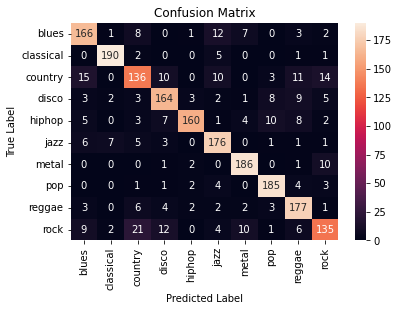

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
class_label = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [101]:
#Random forest algorithms
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='', average='weighted')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred), 3)))



Precision: 0.845 / Recall: 0.844 / F1-Score: 0.843 / Accuracy: 0.844


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to '') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [94]:
rf.score(X_test, y_test)

0.8383383383383384

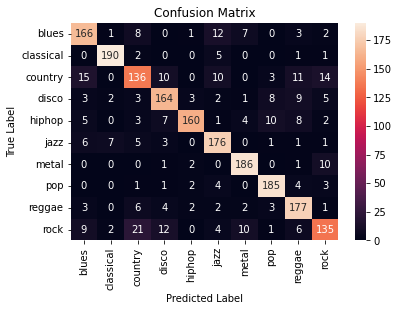

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
class_label = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [86]:
#naive bayes algorithms
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
  
# making predictions on the testing set
y_pred = gnb.predict(X_test)

In [88]:
precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='', average='weighted')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred), 3)))

Precision: 0.519 / Recall: 0.51 / F1-Score: 0.496 / Accuracy: 0.51


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to '') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [89]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [91]:
y_pred= classifier.predict(X_test)

In [92]:
precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='', average='weighted')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred), 3)))


Precision: 0.737 / Recall: 0.739 / F1-Score: 0.737 / Accuracy: 0.739


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to '') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [21]:

audio_path = 'hiphop.00003.wav'
x , sr = librosa.load(audio_path)
print(type(x), type(sr))



<class 'numpy.ndarray'> <class 'int'>


In [22]:
import IPython.display as ipd
ipd.Audio(audio_path)

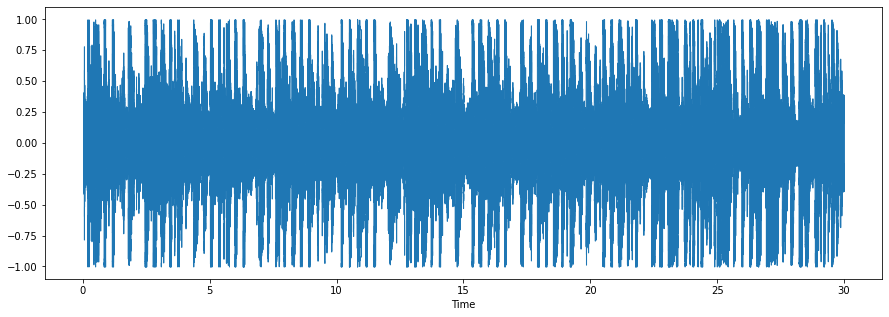

In [23]:
plt.figure(figsize=(15,5))
lplt.waveshow(x)
plt.show()

In [24]:
#finding zero crossing point takin  mean and variance
zcr = librosa.feature.zero_crossing_rate(x)
zcr

array([[0.0390625 , 0.05761719, 0.06591797, ..., 0.1640625 , 0.12597656,
        0.08544922]])

In [25]:
zcr_mean = round(np.mean(zcr),16)
zcr_mean

0.1035012748936582

In [26]:
zcr_var = round(np.var(zcr),16)
zcr_var

0.0022834232185791

In [27]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)
spectral_centroids.shape

C:\Users\EDWIN JOHNSON\AppData\Local\Temp\ipykernel_13876\3790959335.py:1: FutureWarning: Pass y=[-0.18231201 -0.18560791 -0.16290283 ... -0.10397339 -0.02603149
  0.0085144 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)


(1, 1293)

In [28]:
spectral_centroids

array([[1935.05125219, 1902.6254572 , 1907.46139919, ..., 2280.1775326 ,
        2334.24875101, 2263.83907776]])

In [29]:
sc_mean = round(np.mean(spectral_centroids),16)
sc_mean

2492.9547224079165

In [30]:
sc_var = round(spectral_centroids.var(),16)
sc_var


495227.0898206512

In [31]:
S=librosa.feature.chroma_stft(y=x, sr=sr)
S

array([[0.36906803, 0.15153515, 0.15124188, ..., 0.29081318, 0.22518373,
        0.29501042],
       [0.25429207, 0.12824593, 0.16630095, ..., 0.3866258 , 0.2878886 ,
        0.26794276],
       [0.37920716, 0.15672514, 0.179943  , ..., 0.41138795, 0.44422966,
        0.46359935],
       ...,
       [0.24286567, 0.15057656, 0.22836657, ..., 0.25387746, 0.33093143,
        0.45212147],
       [0.44385087, 0.18287633, 0.17562702, ..., 1.        , 1.        ,
        1.        ],
       [0.66234165, 0.18089288, 0.13329662, ..., 0.6648917 , 0.5085642 ,
        0.5727902 ]], dtype=float32)

In [32]:
chroma_mean = round(np.mean(S),16)
chroma_mean

0.4672444

In [33]:
chroma_var = round(np.var(S),16)

In [34]:
rms = librosa.feature.rms(y=x)
rms

array([[0.1344579 , 0.15499876, 0.1743956 , ..., 0.13867806, 0.11365746,
        0.0876554 ]], dtype=float32)

In [35]:
rms_mean = round(np.mean(rms),16)
rms_mean

0.26632264

In [36]:
rms_var = (np.var(rms))
rms_var

0.013483677

In [37]:
#spectral_bandwidth
spec_bw = librosa.feature.spectral_bandwidth(y=x, sr=sr)
#spectral_bandwidth_mean
spec_bw_mean = (np.mean(spec_bw))
spec_bw_mean

2330.1743628788167

In [38]:
spec_bw_var = (np.var(spec_bw))
spec_bw_var

194831.4755307102

In [39]:
roll_off=librosa.feature.spectral_rolloff(y=x, sr=sr)
roll_off_mean=(np.mean(roll_off))
roll_off_mean

5125.735027552204

In [40]:
roll_off_var=(np.var(roll_off))
roll_off_var

1810545.2103917538

In [41]:
y = librosa.effects.harmonic(x)
harmony = librosa.feature.tonnetz(y=y, sr=sr)
#harmony_mean
harmony_mean = (np.mean(harmony))
 
 #harmony_var
harmony_var = (np.var(harmony))

#harmony_label

In [42]:
harmony_mean

-0.009526576412490316

In [43]:
harmony_var

0.011570264383837462

In [44]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)

(20, 1293)


C:\Users\EDWIN JOHNSON\AppData\Local\Temp\ipykernel_13876\205689933.py:1: FutureWarning: Pass y=[-0.18231201 -0.18560791 -0.16290283 ... -0.10397339 -0.02603149
  0.0085144 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=sr)


In [45]:
d = librosa.feature.mfcc(np.array(x).flatten(),sr=22050 , n_mfcc = 20) 
d_var = d.var(axis=1).tolist()
d_mean = d.mean(axis=1).tolist()
d_var 

C:\Users\EDWIN JOHNSON\AppData\Local\Temp\ipykernel_13876\3302972668.py:1: FutureWarning: Pass y=[-0.18231201 -0.18560791 -0.16290283 ... -0.10397339 -0.02603149
  0.0085144 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  d = librosa.feature.mfcc(np.array(x).flatten(),sr=22050 , n_mfcc = 20)


[4952.7890625,
 750.1453247070312,
 1259.17529296875,
 291.8428649902344,
 278.7091979980469,
 309.9650573730469,
 270.60345458984375,
 187.64329528808594,
 174.1464080810547,
 108.06336975097656,
 89.51738739013672,
 75.21646118164062,
 71.80680847167969,
 68.21593475341797,
 73.52408599853516,
 102.35590362548828,
 60.655609130859375,
 62.01555252075195,
 57.279457092285156,
 57.16173553466797]

In [46]:
d_mean

[-40.30154037475586,
 80.84723663330078,
 -25.676889419555664,
 38.44305419921875,
 -11.07282543182373,
 24.899410247802734,
 -7.373212814331055,
 26.759275436401367,
 -5.306029796600342,
 16.782676696777344,
 -3.507571220397949,
 8.458928108215332,
 -5.601728439331055,
 12.050403594970703,
 -1.891737699508667,
 10.464017868041992,
 0.6427529454231262,
 0.2624518871307373,
 -5.098740577697754,
 -4.019601821899414]

In [47]:
mfcc_names=[]

In [48]:
mfcc_names.append("chroma_stft_mean")
mfcc_names.append("chroma_stft_var")
mfcc_names.append("rms_mean")
mfcc_names.append("rms_var")
mfcc_names.append("spectral_centroid_mean")
mfcc_names.append("spectral_centroid_var")
mfcc_names.append("spectral_bandwidth_mean")
mfcc_names.append("spectral_bandwidth_var")
mfcc_names.append("roll_off_mean")
mfcc_names.append("roll_off_mean")
mfcc_names.append("zero_crossing_rate_mean")
mfcc_names.append("zero_crossing_rate_var")
for i in range(1,21):
                mfcc_str = "mfcc"+str(i)+"_mean"
                mfcc_names.append(mfcc_str)
                mfcc_str = "mfcc"+str(i)+"_var"
                mfcc_names.append(mfcc_str)

In [49]:
mfcc_names

['chroma_stft_mean',
 'chroma_stft_var',
 'rms_mean',
 'rms_var',
 'spectral_centroid_mean',
 'spectral_centroid_var',
 'spectral_bandwidth_mean',
 'spectral_bandwidth_var',
 'roll_off_mean',
 'roll_off_mean',
 'zero_crossing_rate_mean',
 'zero_crossing_rate_var',
 'mfcc1_mean',
 'mfcc1_var',
 'mfcc2_mean',
 'mfcc2_var',
 'mfcc3_mean',
 'mfcc3_var',
 'mfcc4_mean',
 'mfcc4_var',
 'mfcc5_mean',
 'mfcc5_var',
 'mfcc6_mean',
 'mfcc6_var',
 'mfcc7_mean',
 'mfcc7_var',
 'mfcc8_mean',
 'mfcc8_var',
 'mfcc9_mean',
 'mfcc9_var',
 'mfcc10_mean',
 'mfcc10_var',
 'mfcc11_mean',
 'mfcc11_var',
 'mfcc12_mean',
 'mfcc12_var',
 'mfcc13_mean',
 'mfcc13_var',
 'mfcc14_mean',
 'mfcc14_var',
 'mfcc15_mean',
 'mfcc15_var',
 'mfcc16_mean',
 'mfcc16_var',
 'mfcc17_mean',
 'mfcc17_var',
 'mfcc18_mean',
 'mfcc18_var',
 'mfcc19_mean',
 'mfcc19_var',
 'mfcc20_mean',
 'mfcc20_var']

In [50]:
test_data=[]

In [51]:
test_data.append(chroma_mean)
test_data.append(chroma_var)
test_data.append(rms_mean)
test_data.append(rms_var)
test_data.append(sc_mean)
test_data.append(sc_var)
test_data.append(spec_bw_mean)
test_data.append(spec_bw_var)
test_data.append(roll_off_mean)
test_data.append(roll_off_var)
test_data.append(zcr_mean)
test_data.append(zcr_var)


for i in range(0,20):
              test_data.append(d_mean [0])
              test_data.append(d_var [0])

In [52]:
test_data

[0.4672444,
 0.09183839,
 0.26632264,
 0.013483677,
 2492.9547224079165,
 495227.0898206512,
 2330.1743628788167,
 194831.4755307102,
 5125.735027552204,
 1810545.2103917538,
 0.1035012748936582,
 0.0022834232185791,
 -40.30154037475586,
 4952.7890625,
 -40.30154037475586,
 4952.7890625,
 -40.30154037475586,
 4952.7890625,
 -40.30154037475586,
 4952.7890625,
 -40.30154037475586,
 4952.7890625,
 -40.30154037475586,
 4952.7890625,
 -40.30154037475586,
 4952.7890625,
 -40.30154037475586,
 4952.7890625,
 -40.30154037475586,
 4952.7890625,
 -40.30154037475586,
 4952.7890625,
 -40.30154037475586,
 4952.7890625,
 -40.30154037475586,
 4952.7890625,
 -40.30154037475586,
 4952.7890625,
 -40.30154037475586,
 4952.7890625,
 -40.30154037475586,
 4952.7890625,
 -40.30154037475586,
 4952.7890625,
 -40.30154037475586,
 4952.7890625,
 -40.30154037475586,
 4952.7890625,
 -40.30154037475586,
 4952.7890625,
 -40.30154037475586,
 4952.7890625]

In [53]:
test_frame = pd.DataFrame([test_data], columns = mfcc_names)

In [54]:
test_frame

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,roll_off_mean,roll_off_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.467244,0.091838,0.266323,0.013484,2492.954722,495227.089821,2330.174363,194831.475531,5125.735028,1.810545e+06,...,-40.30154,4952.789062,-40.30154,4952.789062,-40.30154,4952.789062,-40.30154,4952.789062,-40.30154,4952.789062


In [55]:
# scaler = skp.StandardScaler()
X_t =  pd.DataFrame(scaler.transform(test_frame), columns=test_frame.columns)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- roll_off_mean
Feature names seen at fit time, yet now missing:
- rolloff_mean
- rolloff_var

  warnings.warn(message, FutureWarning)


In [56]:
X_t

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,roll_off_mean,roll_off_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.974321,0.729422,1.96726,2.986773,0.394014,0.184582,0.166445,0.74592,0.343975,0.123873,...,-7.297555,141.129959,-6.350385,134.093212,-7.896815,127.917177,-7.382862,120.0382,-7.509357,103.818568


In [57]:
X

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,3015.559458,...,5.773784,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969
9986,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,3746.694524,...,2.074155,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033
9987,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,2442.362154,...,-1.005473,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990
9988,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,4313.266226,...,4.123402,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750


In [58]:
y_pred = rf_model.predict(X_t)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- roll_off_mean
Feature names seen at fit time, yet now missing:
- rolloff_mean
- rolloff_var

  warnings.warn(message, FutureWarning)


In [59]:
y_pred

array([7], dtype=int64)

In [60]:
t=y_pred

In [61]:
for i in range(10):
                
                
                if t== [[0]]:
                    genre_detected = 'blues'
                elif t== [[1]]:
                    genre_detected = 'classic'
                elif t== [[2]]:
                    genre_detected = 'country'
                elif t== [[3]]: 
                    genre_detected = 'disco'
                elif t== [[4]]: 
                    genre_detected = 'hip_hop'
                elif t== [[5]]: 
                    genre_detected = 'jass'
                elif t== [[6]]: 
                    genre_detected = 'metal'
                elif t== [[7]]:
                    genre_detected = 'pop'
                elif t== [[8]]:
                    genre_detected = 'reggage'
                else:
                    genre_detected = 'rock'

                
print(genre_detected)

pop
